In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

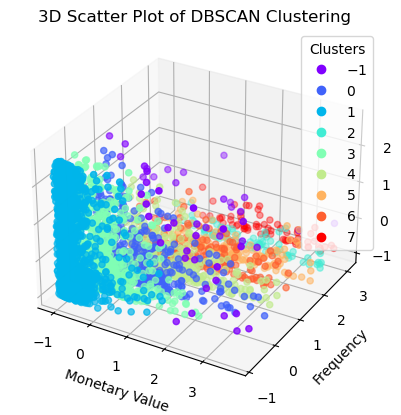

In [2]:
# Load dataset
df = pd.read_csv('online_transactions_non_outliers.csv')

# Scaling the data to ensure fairness through equally weighted data points
# initialise the scaler
scaler = StandardScaler()
# Fit and transform the data - returns numpy array
scaled_data = scaler.fit_transform(df[["MonetaryValue", "Frequency", "Recency"]])
# numpy array of scaled non outlier data
scaled_data

# Passing the scaled data numpy array into a dataframe object
scaled_data_df = pd.DataFrame(scaled_data, index=df.index, columns=['MonetaryValue', 'Frequency', 'Recency'])
scaled_data_df

# Select features for clustering
features = ['MonetaryValue', 'Frequency', 'Recency']
X_scaled = scaled_data_df[features]

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to dataframe
scaled_data_df['Cluster'] = labels

# Plot the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'], c=scaled_data_df['Cluster'], cmap='rainbow')

ax.set_title('3D Scatter Plot of DBSCAN Clustering')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.legend(*scatter.legend_elements(), title="Clusters")
# plt.savefig('3DScatterPlot_of_DBSCANClustering(non-outliers).png', dpi=300)
plt.show()

In [3]:
# Finding out the optimal eps and min_samples
# Initialize variables to store results
best_score = -1
best_params = None
results = []
# Range of eps and min_samples
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(1, 20)

# Perform grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # Ignore if only one cluster or all points are noise
        if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
            score = silhouette_score(X_scaled, labels)
            results.append((eps, min_samples, score))
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f'Best silhouette score: {best_score}')
print(f'Optimal parameters: {best_params}')

Best silhouette score: 0.49359050581388175
Optimal parameters: {'eps': 1.2000000000000002, 'min_samples': 6}


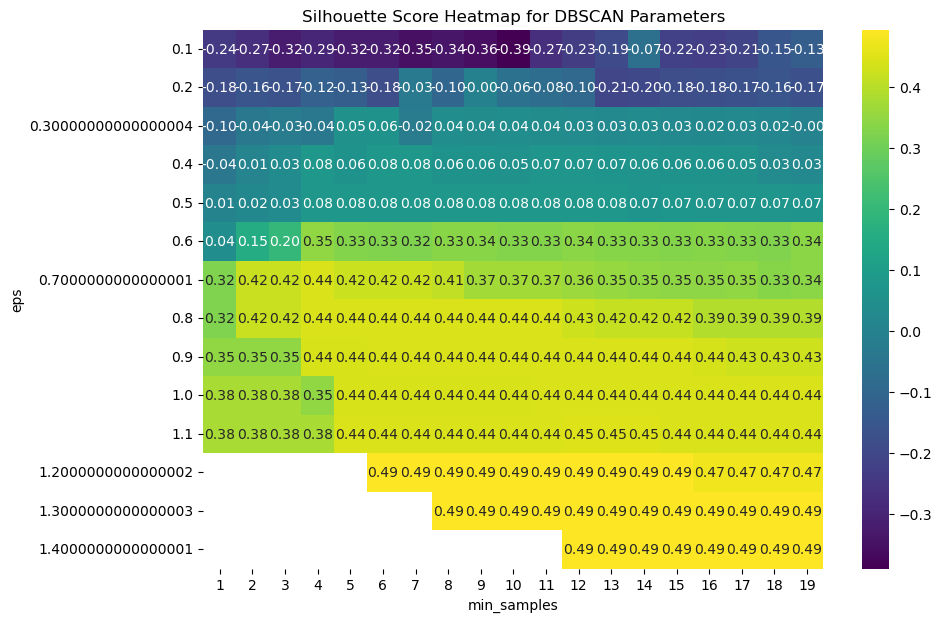

In [15]:
# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score'])

# Pivot the data for heatmap
pivot_table = results_df.pivot_table(index='eps', columns='min_samples', values='silhouette_score')

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis')
plt.title('Silhouette Score Heatmap for DBSCAN Parameters')
plt.xlabel('min_samples')
plt.ylabel('eps')
# plt.savefig('SilhouetteScoreHeatmap_for_DBSCANParameters(non_outliers).png', dpi=300)
plt.show()

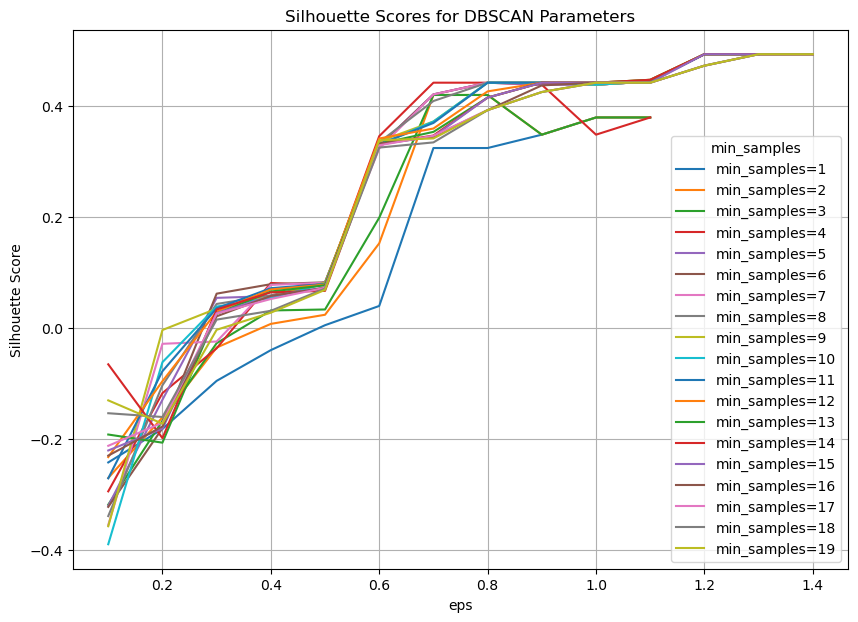

In [17]:
# Plot silhouette scores vs. eps and min_samples using plt.plot
plt.figure(figsize=(10, 7))
for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['silhouette_score'], label=f'min_samples={min_samples}')

plt.title('Silhouette Scores for DBSCAN Parameters')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.legend(title='min_samples')
plt.grid(True)
# plt.savefig('SilhouetteScores_for_DBSCAN_Parameters(non_outliers).png', dpi=300)
plt.show()

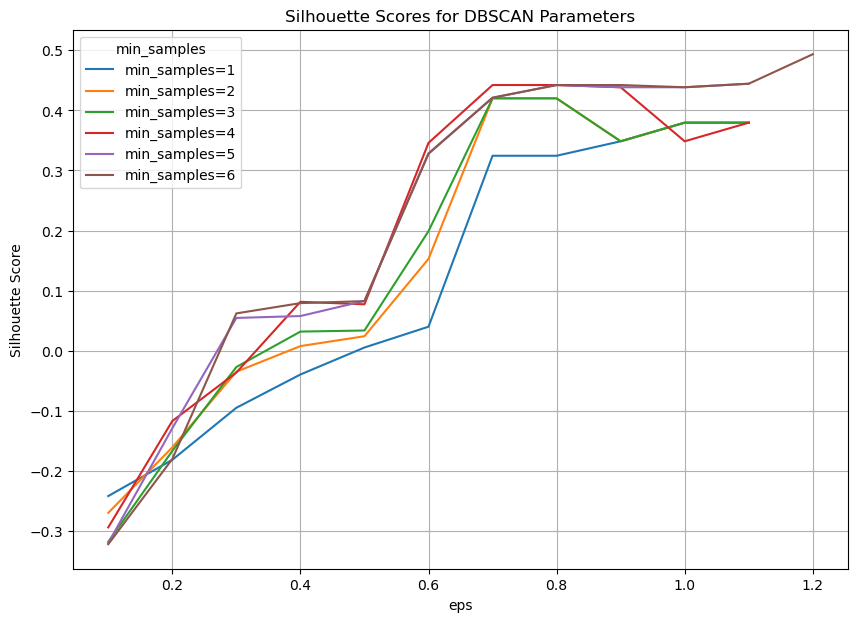

In [19]:
# # Plot silhouette scores vs. eps and min_samples using plt.plot
min_samples_optimal = range(1,7)
plt.figure(figsize=(10, 7))

for min_samples in min_samples_optimal:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['silhouette_score'], label=f'min_samples={min_samples}')

plt.title('Silhouette Scores for DBSCAN Parameters')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.legend(title='min_samples')
plt.grid(True)
# plt.savefig('OptimalSilhouetteScores_for_DBSCAN_Parameters(non_outliers).png', dpi=300)
plt.show()

In [35]:
# Using the optimal parameters found
optimal_eps = 1.2000000000000002
optimal_min_samples = 6

# Perform DBSCAN clustering
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
optimal_labels = dbscan_optimal.fit_predict(X_scaled)

# Add cluster labels to the dataframe
scaled_data_df['Cluster'] = optimal_labels
optimal_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

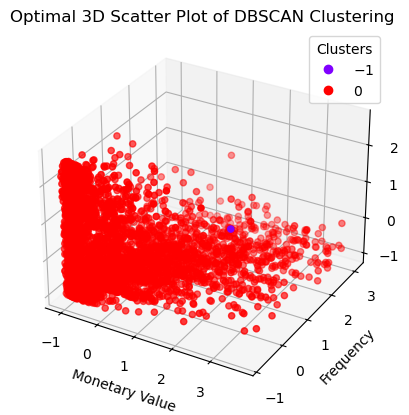

In [37]:
# Plot the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'], c=scaled_data_df['Cluster'], cmap='rainbow')

ax.set_title('Optimal 3D Scatter Plot of DBSCAN Clustering')
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.legend(*scatter.legend_elements(), title="Clusters")
# plt.savefig('Optimal3DScatterPlot_of_DBSCANClustering(non-outliers).png', dpi=300)
plt.show()

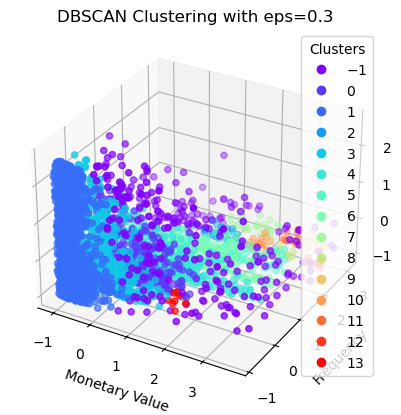

eps: 0.3 - Silhouette Score: 0.49359050581388175


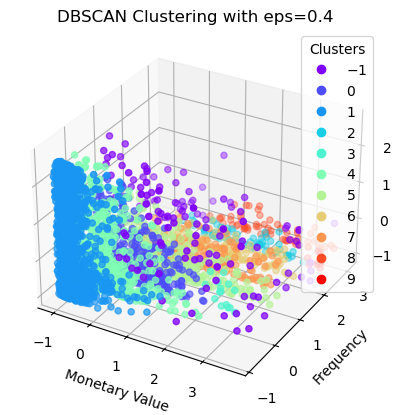

eps: 0.4 - Silhouette Score: 0.49359050581388175


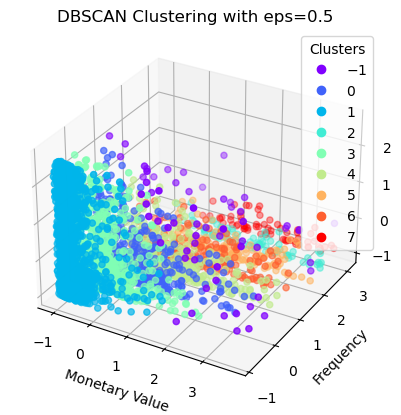

eps: 0.5 - Silhouette Score: 0.49359050581388175


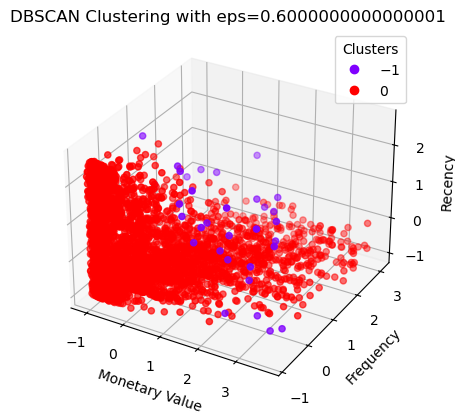

eps: 0.6000000000000001 - Silhouette Score: 0.49359050581388175


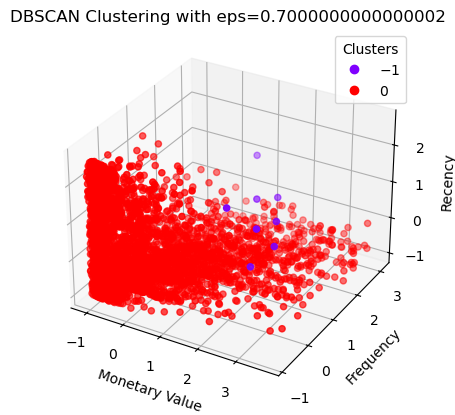

eps: 0.7000000000000002 - Silhouette Score: 0.49359050581388175


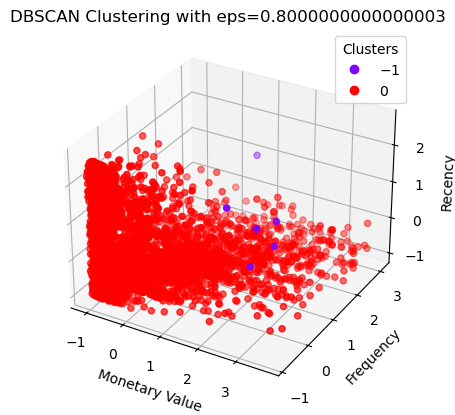

eps: 0.8000000000000003 - Silhouette Score: 0.49359050581388175


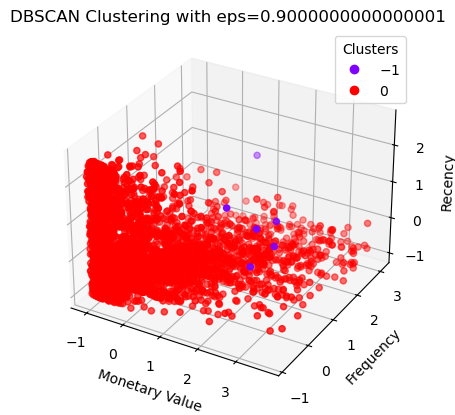

eps: 0.9000000000000001 - Silhouette Score: 0.49359050581388175


In [40]:
# Adjust eps further
for new_eps in np.arange(0.3, 0.9, 0.1):
    dbscan_new_adj = DBSCAN(eps=new_eps, min_samples=8)
    labels_new_adj = dbscan_new_adj.fit_predict(X_scaled)
    
    # Plot
    scaled_data_df['Cluster'] = labels_new_adj
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'], c=scaled_data_df['Cluster'], cmap='rainbow')
    ax.set_title(f'DBSCAN Clustering with eps={new_eps}')
    ax.set_xlabel('Monetary Value')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Recency')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    # plt.savefig('DBSCANClustering_with_new_eps.png', dpi=300)
    plt.show()
    
    # Silhouette Score
    if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
        silhouette_avg = silhouette_score(X_scaled, labels)
        print(f'eps: {new_eps} - Silhouette Score: {silhouette_avg}')
    else:
        print(f'eps: {new_eps} - Unable to calculate silhouette score')